In [88]:
import os
from data import *
from preprocess import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from scipy import stats
from skimage.filters import laplace

In [49]:
is_jpg = lambda x: x.split('.')[-1] == 'jpg'
is_tif = lambda x: x.split('.')[-1] == 'tif'
folder = 'dataset_original'
files = os.listdir(folder)
imgs = np.stack([get(jpg_file, folder) for jpg_file in filter(is_jpg, files)])
masks = np.stack([get(tif_file, folder) for tif_file in filter(is_tif, files)]).astype(bool)
samples = [img[mask] for img, mask in zip(imgs, masks)]
back = [img[~mask] for img, mask in zip(imgs, masks)]

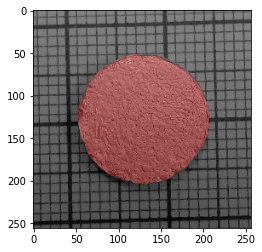

In [87]:
i = np.random.randint(len(imgs))
plt.imshow(label2rgb(masks[i], imgs[i]))

In [91]:
def hist(func):
    A = list(map(func, samples))
    B = list(map(func, back))
    bins = np.histogram(np.hstack((A, B)), bins=20)[1]
    plt.hist(A, bins, alpha=0.6, label='amostra')
    plt.hist(B, bins, alpha=0.6, label='papel')
    plt.legend()
    plt.xlabel(func.__name__)
    plt.show()

def scatter(func1, func2):
    plt.scatter(list(map(func1, samples)), list(map(func2, samples)), alpha=0.6, label='amostra')
    plt.scatter(list(map(func1, back)), list(map(func2, back)), alpha=0.6, label='papel')
    plt.legend()
    plt.xlabel(func1.__name__)
    plt.ylabel(func2.__name__)
    plt.show()

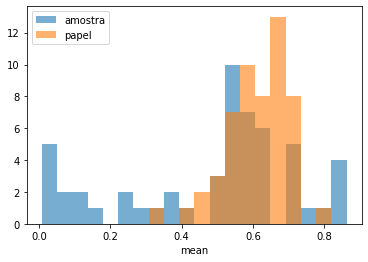

In [92]:
hist(np.mean)

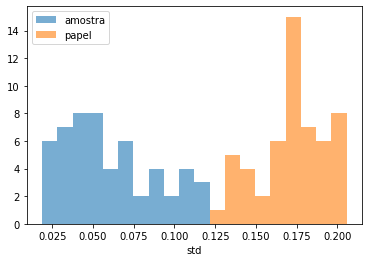

In [93]:
hist(np.std)

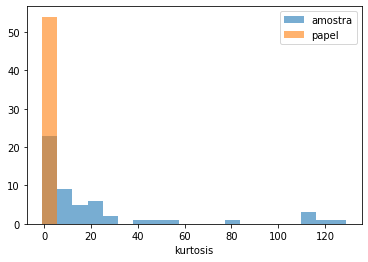

In [94]:
hist(stats.kurtosis)

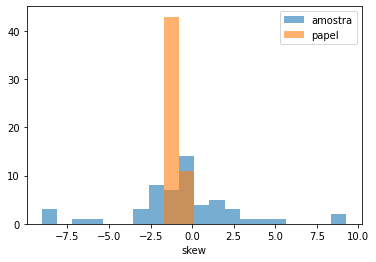

In [95]:
hist(stats.skew)

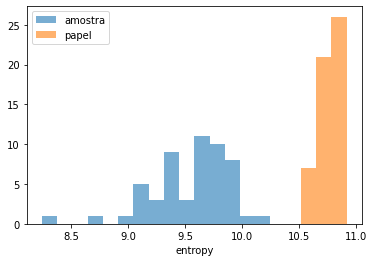

In [96]:
hist(stats.entropy)

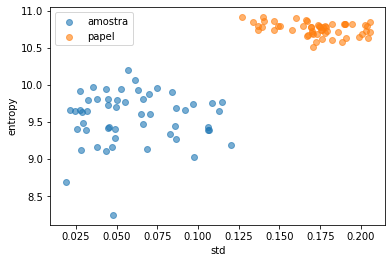

In [97]:
scatter(np.std, stats.entropy)